# Final Project:  Spam filter

## Task

You’re the project manager for an enterprise email system and assigned a task to develop a spam filter for a company's email system. We’ve collected email samples that have been validated to be spam or non-spam emails. Your task is to predicts whether an email contains spam or not.

You are given 3068 training emails with two classes: "spam" or "not spam". Using these data, you are expected to build your own spam filter with the kownledge you learned from this course. The goal is to correctly classify 1292 test emails. 




### Example
- **Spam email**

> Subject: younger and healthier with ultimate - hghl 7283  as seen on nbc , cbs , cnn , and even oprah ! the health discovery that actuallyreverses aging while burning fat , without dieting or exercise ! this provendiscovery has even been reported on by the new england journal of medicine . forget aging and dieting forever ! and it ' s guaranteed !  click below to enter our web site :  http : / / www . freehostchina . com / washgh /  would you like to lose weight while you sleep !  no dieting !  no hunger pains !  no cravings !  no strenuous exercise !  change your life forever !  100 % guaranteed !  1 . body fat loss 82 % improvement .  2 . wrinkle reduction 61 % improvement .  3 . energy level 84 % improvement .  4 . muscle strength 88 % improvement .  5 . sexual potency 75 % improvement .  6 . emotional stability 67 % improvement .  7 . memory 62 % improvement .  click below to enter our web site :  http : / / www . freehostchina . com / washgh /  if you want to get removed  from our list please email at - standardoptout @ x 263 . net ( subject = remove " your email " )

- **Not-spam email**

> Subject: december 6 th meeting  dear mr . kaminski :  this is to confirm the december 6 th meeting here at our center .  the location for the meeting is room # 3212 steinberg hall - dietrich hall and  the time will run from 9 : 00 am - 11 : 00 am .  please let us know if you need anything further .  we look forward to seeing you then .  regards ,  theresa convery  ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~  theresa convery  administrative assistant  risk and decision processes center  the wharton school of the university of pennsylvania  ( 215 ) 898 - 5688 / fax : ( 215 ) 573 - 2130  tconvery @ wharton . upenn . edu

## Outline of solution


**1. Text representation.**

As you can see, text content of emails is unstructured data. To apply machine learning methods on top of them, we first need to extract structured feature. To demonstrate this, we'll show using bag-of-word model for textural represention.

** 2. Build your classifier. **

As baseline, we provide solution based on *SVM* (Support Vector Machine).

** 3. Evaluation **

We will use *AP* (Average Precision) and *Accuracy* for performance evaluation in this notebook.

Note that for evaluation on kaggle competition, [*MCE*](https://www.kaggle.com/wiki/MeanConsequentialError) (Mean Consequential Error) is used instead.


## Python package dependence
- **pandas**   : for loading CSV files;
- **nltk**     ：for word pre-processing;
- **wordcloud**: for data visulization.

Tips: To install missing packages, you can either do "pip install package_name" or "conda install package_name" in case of anaconda.

# Data preparation

## 1) Download data.

Download "emails.train.csv", "emails.test.csv" from our kaggle competition page [here](https://www.kaggle.com/c/spamfilter-aml-uva/data), and put it under the same folder as this ipython notebook.



## 2) Read in data.

In [4]:
import os, sys
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

assert os.path.exists('./emails.train.csv'), "[Dataset File Not Found] Please download dataset first."

In [15]:
# Read in csv file as dataframe
df = pd.read_csv('./emails.train.csv')
zf = pd.read_csv('./emails.test.csv')
# Show a snippet of dataset.
print df.head()
print np.sum(zf['spam'])
spamappend = 0
hamappend = 0
for i in df["spam"]:
    if i == 1:
        spamappend += 1
    if i == 0:
        hamappend +=1

probspam = float(spamappend)/(spamappend+hamappend)
print probspam
spam = sum(df["spam"])
ham =  len(df["spam"])-sum(df["spam"])
probspam = float(spam)/(spam+ham)
print probspam

   id                                               text  spam
0   0  Subject: naturally irresistible your corporate...     1
1   2  Subject: unbelievable new homes made easy  im ...     1
2   3  Subject: 4 color printing special  request add...     1
3   4  Subject: do not have money , get software cds ...     1
4   5  Subject: great nnews  hello , welcome to medzo...     1
415
0.23700571997
0.23700571997


As you can see above, each emails has two fields: 
* "text": the full text content of an email.
* "spam": an integer flag to mark whether an email is a spam (=1) or not (=0).

In [32]:
print("===========================")
print("Example of spam emails")
print("---------------------------")

df_pos = df[df['spam']==1]

print( np.random.choice(df_pos['text']) ) 

print("===========================")

Example of spam emails
---------------------------
Subject: muscles , money , and looks help - but women want a bigger man irbxij  in a recent survey conducted by durex  condoms , 67 %  of women said thatthey are unhappy with the size of their lovers . proof that size doesmatter ! a large member has much more surface area and is capable ofstimulating more nerve endings , providing more pleasure for you and yourpartner . our revolutionary pill developed by world famous pharmacist isguaranteed to increase your size by 1 - 3 " . enter here for detailsto come off just open here


In [33]:
print("===========================")
print("Example of not spam emails")
print("---------------------------")

df_neg = df[df['spam']==0]

print( np.random.choice(df_neg['text']) ) 

print("===========================")

Example of not spam emails
---------------------------
Subject: re : confidential  sophie ,  thanks . i shall discuss this with steve as soon as we have the nomination  form signed .  i can do it while he is stioll here at houston .  vince  sophie kingsley 09 / 05 / 2000 10 : 37 am  to : dale surbey / lon / ect @ ect  cc : vince j kaminski / hou / ect @ ect , michele small / lon / ect @ ect  subject : re : confidential  we need to get a nomination form signed by you & vince . once we have this  you guys can discuss the figures with steve and once everything is agreed we  will get the nomination form signed by sherriff and the agreement drawn up .  i will get one up to you today / tomorrow .  dale surbey  05 / 09 / 2000 15 : 33  to : vince j kaminski / hou / ect @ ect  cc : sophie kingsley / lon / ect @ ect , michele small / lon / ect @ ect  subject : re : confidential  sophie - what do we need to do to implement this ?  vince - do you want to go through this with steve while he ' s in 

# Text representation

## 1) Create the bags of words vocabulary. 

The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity. The bag-of-words model has also been used for computer vision. (from [wikipedia](https://en.wikipedia.org/wiki/Bag-of-words_model))


In [34]:
# DIT ITEREERT DUS OVER DE PANDAS DATAFRAME
def select_vocabulary(dataframe, topN=10000):
    # for w in dataframe.str.lower():
    word2freq = dict()
    for line in dataframe:
        words = line.split()
#       met setdefault fixed ie de value in de dict op 0 tenzij er iets te tellen valt dan +1
        for word in words:
            word2freq[word] = word2freq.setdefault(word, 0) +1

    word_freq = [ (word,freq) for word,freq in word2freq.items() ]
    
    # sort according to freq, in descending order.
    word_freq.sort(key=lambda x:x[1], reverse=True) 
    
    # show selection results
    print("%-10s  %10s" % ('word', 'frequency'))
    print("-------------------------")
    for i in range(15):
        print("%-10s  %10d" % (word_freq[i]))
    print("...\n")
    
#     returned top 100 meest voorkomende woorden
    return([x[0] for x in word_freq[:topN]])

vocabulary = select_vocabulary(df['text'])
word2ind   = dict(zip(vocabulary, range(len(vocabulary))))
# dus als je print vocabulary[0] krijg je - en als je doet word2ind['-'] krijg je 0 gezien die het vaakst voorkomt
print word2ind['enron']
print vocabulary[0]

word         frequency
-------------------------
-                72932
.                65233
,                42792
the              34362
:                29814
to               28822
/                27959
and              19173
of               16317
>                14658
a                13894
you              13305
in               12631
i                12151
for              11639
...

17
-


## 2) Extract Bag-of-Word Feature

In [6]:
print vocabulary

['-', '.', ',', 'the', ':', 'to', '/', 'and', 'of', '>', 'a', 'you', 'in', 'i', 'for', '_', '@', 'enron', 'is', 'on', 'ect', ')', "'", 'this', '?', '(', 'be', 'that', 'your', '"', 'with', 'we', 'vince', '*', 'will', 'have', 'at', 'from', 'it', 'are', 's', 'as', 'Subject:', 'hou', 'com', 'by', 'or', 'if', '!', 'am', '2000', 'please', 'kaminski', 'subject', 'me', 'would', 'not', 'our', 'can', 're', '$', 'cc', 'my', 'j', 'an', '1', '=', 'pm', '2', '2001', 'all', 'research', 'any', 'time', '10', 'do', 'thanks', 'know', ';', 'has', '3', 'may', 'information', 'group', 'about', 'e', 'new', 'he', '0', 'energy', 'was', 'more', 'get', 'like', '00', 'business', 'risk', 'one', 'but', 'up', 'let', 'what', 'message', 'so', 'us', 'mail', 'also', 'power', '5', 'some', 'email', 'here', 'need', '11', '30', 't', '01', 'which', 'corp', 'http', 'shirley', 'very', 'out', 'edu', 'there', '4', 'they', '12', 'forward', '&', 'meeting', 'company', 'no', 'been', 'houston', 'market', 'management', 'other', 'work',

In [29]:
def extract_Bag_of_Word_feature(dataframe):
    BoWs = np.zeros((len(dataframe), len(vocabulary)), dtype=np.float32)

    for i, line in enumerate(dataframe):
        for word in line.split():
            word_ind = word2ind.get(word, -1)
            print i
            if(word_ind>=0):
                BoWs[i, word_ind] += 1

        if i%1000==0:
            print("%4d / %d " % (i, len(dataframe)))
    print("%4d / %d " % (i, len(dataframe)))
            
    return BoWs


# Make sure use cleaned version
train = pd.read_csv('./emails.train.csv')
test  = pd.read_csv('./emails.test.csv')

# Get labels
Y_train = train['spam']
Y_test  = test['spam']

print("Extracting feature for train ...")
X_train = extract_Bag_of_Word_feature(train['text'])

print("Extracting feature for test ...")
X_test  = extract_Bag_of_Word_feature(test[ 'text'])

print('Finish.')

Extracting feature for train ...
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
   0 / 4021 
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


KeyboardInterrupt: 

# Baseline solution

In [8]:
from sklearn.metrics import average_precision_score, accuracy_score
from sklearn.svm import SVC

model = SVC()

model.fit(X_train, Y_train)

def eval(model, X_test, Y_test, method=''):
    print("====== Performance of: {method} =======".format(method=method))
    
    # Predict decision labels.
    Y_pred  = model.predict(X_test)  
    print("Metric[{metric:20s}]  {score:-3f}".format( metric="Accuracy", 
                                              score=accuracy_score(Y_test, Y_pred)) )

    # Predict confidence scores.
    Y_score = model.decision_function(X_test)    
    print("Metric[{metric:20s}]  {score:-3f}".format( metric="Average Precision", 
                                              score=average_precision_score(Y_test, Y_score)) )

    # write to submit format
    outf = 'kaggle_data/solution.%s.csv'% method
    with open( outf, 'w') as f:
        f.write('id,spam\n')
        for i in range(len(Y_pred)):
            # print test['id'][0]
            f.write('%s,%s\n' % (test['id'][i], Y_pred[i]) )
    print("[output] "+outf)
    
    
# evaluate current model
eval(model, X_test, Y_test, method='SVM')

====== Performance of: SVM =======
Metric[Accuracy            ]  0.887522
Metric[Average Precision   ]  0.953166
[output] kaggle_data/solution.SVM.csv


Notice that the positive and negative examples in test is not balance (with Nr(pos)=1707, Nr(neg)=415 )

In [9]:

# Predict all labels as negative (=0)
print("====== Predict as all negative =======")
Y_pred_all_neg  = np.zeros((len(Y_test),), dtype=np.int)
print("Metric[{metric:20s}]  {score:-3f}".format( metric="Accuracy", 
                                          score=accuracy_score(Y_test, Y_pred_all_neg)) )

# Random guess performance
print("====== Predict by random guess =======")
Y_score_rand = np.random.uniform(0,1, (len(Y_test),))    # Generate prediction score by random
print("Metric[{metric:20s}]  {score:-3f}".format( metric="Average Precision", 
                                              score=average_precision_score(Y_test, Y_score_rand)) )



====== Predict as all negative =======
Metric[Accuracy            ]  0.756883
====== Predict by random guess =======
Metric[Average Precision   ]  0.251874



# Advanced: Data Preprocess

However, obtaining good textural representation can be tricky as you may notice that the content of emails are noisy.
We'll provide example code for text cleaning and you are expected to come up with smarter way to do it.

## Text cleaning

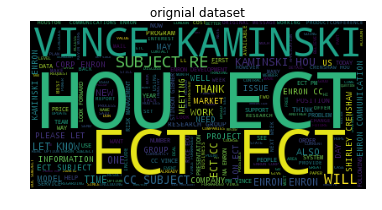

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# Om dit te runnen heb je de wordcloud module nodig.. als je op linux zit gewoon pip install wordcloud
from wordcloud import WordCloud

def wordcloud(dataframe, title=None):
    wordcloud = WordCloud(background_color="black").generate(" ".join([i for i in dataframe.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    if title is not None:
        plt.title(title)

# show the word cloud of orignial dataset.
wordcloud(df['text'], 'orignial dataset')

- ### **Stop words** 
 Stop Words are words which do not contain important significance to be used in Search Queries. For example, 'a', 'the', 'is', 'as', etc. Usually these words need to be filtered out because they return vast amount of unnecessary information. 

- ### **Stemming**
 In linguistic morphology and information retrieval, stemming is the process for reducing inflected (or sometimes derived) words to their stem, base or root form—generally a written word form. The stem need not be identical to the morphological root of the word; it is usually sufficient that related words map to the same stem, even if this stem is not in itself a valid root. Algorithms for stemming have been studied in computer science since the 1960s. Many search engines treat words with the same stem as synonyms as a kind of query expansion, a process called conflation.

 Stemming programs are commonly referred to as stemming algorithms or stemmers.

- ### **Lemmatization**
 Lemmatisation (or lemmatization) in linguistics, is the process of grouping together the different inflected forms of a word so they can be analysed as a single item.

 In computational linguistics, lemmatisation is the algorithmic process of determining the lemma for a given word. Since the process may involve complex tasks such as understanding context and determining the part of speech of a word in a sentence (requiring, for example, knowledge of the grammar of a language) it can be a hard task to implement a lemmatiser for a new language.

 In many languages, words appear in several inflected forms. For example, in English, the verb ‘to walk’ may appear as ‘walk’, ‘walked’, ‘walks’, ‘walking’. The base form, ‘walk’, that one might look up in a dictionary, is called the lemma for the word. The combination of the base form with the part of speech is often called the lexeme of the word.

 Lemmatisation is closely related to stemming. The difference is that a stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech. However, stemmers are typically easier to implement and run faster, and the reduced accuracy may not matter for some applications.

We’ll use python package *nltk* to do this. But before any operation, we need to download necessary nltk corpuses first with its interface.

In [11]:
# Download nltk corpus
import nltk

In [12]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

| Instal Wordnet corpus                | Instal Stopwords corpus                |
| ------------------------------------ |:--------------------------------------:|
| ![alt text](images/nltk_wordnet.png) | ![alt text](images/nltk_stopwords.png) |




In [14]:
def text_regularize(dataframe, method='lemm'):
    print('Performing: %s ...' % method)
    def stemming(worker, tag):
        return worker.stem(tag)

    def lemmatize(worker, tag):
        return worker.lemmatize(tag)

    if   method=='stem':
        worker = nltk.PorterStemmer()
        func = stemming
    elif method=='lemm':
        worker = nltk.WordNetLemmatizer()
        func = lemmatize
    else:
        raise NotImplementedError

    for i, line in enumerate(dataframe['text']):
#         haalt de woorden uit de dataframe
        elems = line.strip().split()
    
        # apply stemming or lemmatize
        newtags = [func(worker,tag.lower()) for tag in elems]
        newline = " ".join(newtags)

        # update text
        dataframe.loc[i,'text'] = newline

    # return dataframe

def text_filtering(dataframe, extras=set()):
    print('Performing: filtering ...')
    import re
    
    from nltk.corpus import stopwords
    filter_set = set(stopwords.words('english'))
    filter_set.update(extras)

    for i, line in enumerate(dataframe['text']):
        # remove special characters with regex
        line = re.sub(r'[^\w]', ' ', line)

        # remove digits with regex
        line = re.sub("(^|\W)\d+($|\W)", " ", line)

        # remove stop words
        elems = line.strip().split()
        newtags = filter(lambda x: x not in filter_set, elems)
        newline = " ".join(newtags)

        # update text
        dataframe.loc[i, 'text'] = newline
    # return dataframe
    

print('========= Clearn tranining data ==========')
# Read in training data
df = pd.read_csv('./emails.train.csv')

# Do cleaning
text_regularize(df, 'lemm')
text_regularize(df, 'stem')
text_filtering(df, extras=set(['subject', 'ect', 'hou', '_']))

# Save as new file
df.to_csv('emails_clean.train.csv')


print('========= Clearn testing data ==========')
# Read in testing data
df = pd.read_csv('./emails.test.csv')

# Do cleaning
text_regularize(df, 'lemm')
text_regularize(df, 'stem')
text_filtering(df, extras=set(['subject', 'ect', 'hou', '_']))

# Save as new file
df.to_csv('emails_clean.test.csv')

print('finish')

========= Clearn tranining data ==========
Performing: lemm ...
Performing: stem ...
Performing: filtering ...
========= Clearn testing data ==========
Performing: lemm ...
Performing: stem ...
Performing: filtering ...
finish


In [ ]:
# Now show the word cloud after cleaning.
wordcloud(df['text'], 'After text cleaning')

# Based on the observation from this word cloud, you may add more non-meaningful words into `extras'. 

In [18]:

train = pd.read_csv('./emails_clean.train.csv')
test  = pd.read_csv('./emails_clean.test.csv')

# Get labels
Y_train = train['spam']
Y_test  = test[ 'spam']


print("[TODO] Preparing text feature.")

# X_test



print("[TODO] Training your model.")


# Takes as input frequency table of spam words, frequency table of ham words,the mail we have to check,
# probability mail is spam, total frequency of words in spam and total frequency of words  in  ham

def CallBae(freqspam,freqham,mail,probspam,totalfreqs,totalfreqh):
    spamchecklist = []
     
    for word in mail:
        #######     TODO get words from mail 
    
        if word in freqspam and word in freqham:
#           check frequency of word in spam and ham frequency tables
            freqsword = freqspam[word]
            freqhword = freqham[word]
        
            spamchecklist.append(NaiveBayesian(probspam,freqsword,freqhword,totalfreqs,totalfreqh))

    #   if the word is in neither spam or ham we put it on 0
        elif word not in freqspam and word not in freqham:
            spamchecklist.append(0)

    #  we initialize freqsword as a tiny number here cause else the Bayesian would not be able to pick up that 
    #  the word is in ham if the word never appears in spam
        elif word in freqham and word not in freqspam:
            
            freqsword = 10**(-8)
#           check freq of word in frequency table ham
            freqhword = freqham[word]
    
            spamchecklist.append(NaiveBayesian(probspam,freqsword,freqhword,totalfreqs,totalfreqh))

            
# Make spam checklist a np array and perform final test
    spamchecklist = np.array(spamchecklist)
    finaljudge = sum(spamchecklist/len(spamchecklist))
    
#   Return False if spam
    if finaljudge > 0.5:
        return False
#   Return True if ham
    if finaljudge < 0.5:
        return True
    


# freqsword = frequency word in spam, freqhword is frequency word in ham
def NaiveBayesian(probspam,freqsword,freqhword,totalfreqs,totalfreqh):
    
#   calculate probability of mail being ham
    probham = (1-probspam)
    
#   calculate probability of word being in spam or word being in spam not right yet
    probwordspam = freqsword/(totalfreqs)
    probwordham = freqhword/(totalfreqh)
    
#  Calculate Naive bayesian
    return ((probwordspam*probspam)/(probwordspam*probspam + probwordham*probham))
    
    
# Here we call our Naive Bayesian performer with the data we read in from train and test and check
# if the test mail is spam or not
    
def Classifier():
    iddict = {}
    spamdict = {}
    idlist = []
    spamlist = []

# loop through all the mails in the test and perform naive bayesian and add id number to the list
    for i in range(len(test)):
        idlist.append(i)
        
#       ####TODO###  mail = READMAILFROMTEST[i]
        ####TODO### fetch freqspam, freqham,probspam,totalfreqs,totalfreqh
    
#             SOMETHING LIKE THIS FOR PROBSPAM
#         spam = sum(df["spam"])
#         ham =  len(df["spam"])-sum(df["spam"])
#         probspam = float(spam)/(spam+ham)
        
        if CallBae(freqspam,freqham,mail,probspam,totalfreqs,totalfreqh):
            spamlist.append(1)
#             ####TODO#### ADD MAIL WORDS TO SPAM FREQUENCY TABLE, and total train dataframe (in order to properly
#            calculate probspam) AND RECALCULATE TOTALFREQS AND PROBSPAM
            
        else:
            spamlist.append(0)
#             ####TODO#### ADD MAIL WORDS TO HAM FREQUENCY TABLE, and total train dataframe (in order to properly
#            calculate probspam) AND RECALCULATE TOTALFREQH AND PROBSPAM
    
    spamdict['spam'] = spamlist
    idlist['id'] = idlist
    spamdict = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in spamdict.items()]))
    iddict = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in iddict.items()]))
    submission = pd.concat([iddict,spamdict])
    submission.set_index('id',inplace=True)
    submission.to_csv('submission.csv')
    return submission

#############################
#####  Your solution    #####
#############################



print("[TODO] Evaluate your model.")

submission = Classifier()

# that wasnt that hard was it...
# MEAN CONSEQUENTIAL EVALUATER:
MCE = 1./np.len(submission['spam'])*np.sum((zf["spam"]-submission['spam']))
print MCE


#############################
#####  Your solution    #####
#############################





[TODO] Preparing text feature.
[TODO] Training your model.
[TODO] Evaluate your model.


NameError: global name 'freqspam' is not defined